<a href="https://colab.research.google.com/github/samarth0174/SMS-SPAM-FILTERING/blob/master/spamfiltersms_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SMS Spam classification**
The given dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Task is to build a prediction model that will accurately classify which texts are spam**

## **Steps:**
- Importing Libraries
- Exploring the Dataset & removing unwanted columns
- Exploratory Data Analysis
 - Univariate Analysis
 - Text Analysis 
- Feature Engineering - CountVectorisation
- preprocessing data before loading to data 
- Predictive analysis 
- Conclusion


## **Importing Libraries**

In [0]:
#importing the necessary packages to process or plot the data


**Read the text file with the help of pandas read_table function**

In [0]:
# with the help of pandas read the csv file of spam_sms with their read_csv method and store in dataframe.

'''Import the dataset into a pandas dataframe using the read_table method. 
   Because this is a tab separated dataset we will be using '\t' 
   as the value for the 'sep' argument which specifies this format.
   Also, rename the column name by specifying a list ['v1', 'v2'] 
   to the 'names' argument of read_table().'''
    

In [0]:
# using the head function see what is originlly present in the dataset


**Shape of the dataset**

In [0]:
# shape method gives the shape of dataframe


**Size of the dataset**

In [0]:
#size

**Description of all particular column of the dataset**

In [0]:
# descrbe function gives the detailed description of dataframe



In [0]:
#describe data by group

## **Exploratory Data Analysis**


## **Univariate analysis**


In [0]:
#todo : do a univaiate analysis 
#distribution of spam/non spam data

####

## **Text Analysis**
It is an important step when dealing with text data

**We want to find the frequencies of words in the spam and non-spam messages. 
We use the function Counter.**

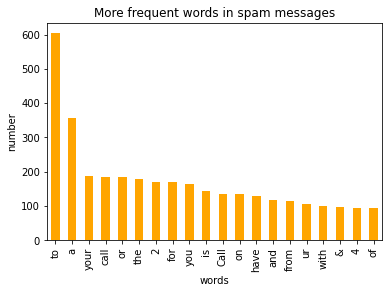

In [3]:
#import counter function
from collections import Counter

#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


<b>We can see that the majority of frequent words in msgs are **'the', 'to', 'a', 'or' and so on. These are called stop words and are a part of english grammer,but they don't really convey your message, we need to find the actual vocabulary words which contribute to the meaning**</b><p>
With stop words we refer to the most common words in a lenguage, there is no simgle, universal list of stop words. <p>

<b>Using skearn , we will import the stopwords dataset listed,and remove them from our messages and again analyse the messages</b>
## <b>Now we will remove the stopwords and again do the analysis</b>

In [0]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#removing the stop-words from the messages(complete dataset)
data['v2']=data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [0]:
## todo: rewrite the counter code here, and check the most frequent words 

<b>Above after removing the stop words , we can actually find some meaningful words, like "Free","Contact" which can be actially found in spam mails</b>

In [0]:
##todo:Do the same for finding most frequent words in Non-Spam messages:

#note: stop words are already removed from all ham/spam sentences 

Optional: Do an analysis regarding the lenghts of spam and ham messages.

Did you observe ay pattern?? 

####

## **Feature engineering**

## **First we need to understand how to Prepare Text Data for Machine Learning**
## **1. Intution/logic:**
- Text data requires special preparation before you can start using it for predictive modeling.
- The text must be parsed to remove words, called tokenization. 
- Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).
-scikit-learn library offers easy-to-use tools to perform both tokenization and feature extraction of your text data
- **Since we cannot work with words directly we convert text to fixed-length vectors of numbers - also called Bag-of-words model** 
## **So Intution is to input Vectors --> model -->output class(spam/ham)**
-The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

- Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

## **2. Vectorisation:**
- This can be done by assigning each word a unique number. 
- Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. 
- The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.
- An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.
-  eg. he is a boy 
            attribute name assigned to words : he ->1 , is ->2 , a->3 , boy->4
            considering the above sentence -count the occurance of each word 
            so vector is [1 1 1 1]
-  The above logic is applied for complete corpus(text dataset)

(Note: This is just a basic intution for understanding in detail pls refer <html><a href="https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/"><b>this link</b></a></html>) 
            
## **3. Scikit learn Count Vectorizers:** 
- Count Vectorizers provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.    
## Below is an example for reference:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


**Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.**
**We remove the stop words in order to improve the analytics**

## **TODO: Vectorize spam message data ie. data["v2"]**
## You will be amazed by looking at the vocabulary

In [0]:
#todo : vectorise the spam messages
'''the vector produced will be treated as
   input X for the models''''

## **Predictive Analysis**

### **Preprocessing before loading data:**

**Check for any missing values(if any)** 

In [0]:
#find null values/impute

**First we transform the variable spam/non-spam into binary variable(Binary Classification), then we split our data set in training set and test set.**


In [0]:
#todo: map spam as 1 , ham as 0 (Binary varaibles)

**train-test split**


In [0]:
##todo :use sklearn model selection - test_train_split

#note: the arguments are X= vector , Y = data['v2']

## **Do a comaprison between each classifier's performance and select the best one**
1. Multinomial NaiveBayes
2. Gaussian NaiveBayes
3. LogisticRegression
4. DecisionTree
5. RandomForestClassifier
6. AdaBoostClassifier
- can also try any other classifiers.
- Try your models without removing the stop words and compare the results.
- use Gridsearch CV to tune algos

##Conclusion